## Red Wine data analysis

In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
#loading data as pandas dataframe
df = pd.read_csv("winequality_red.csv")

Exploratory data analysis

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

* Target variable which is "quality" has value count from 3 to 8. Also, data is not imbalanced. So we can apply ordinal regression for this problem.

In [6]:
#check missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* data does not have any missing values.

### Visualizing data

c:\users\rahul-pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

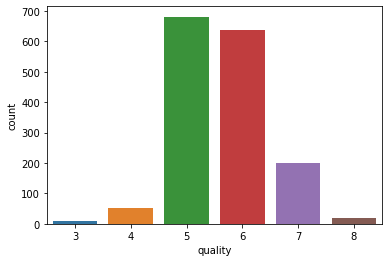

In [7]:
import seaborn as sns

sns.countplot(df["quality"])

* Clearly, we can see most of the data is centered at 5 and 6 quality level.


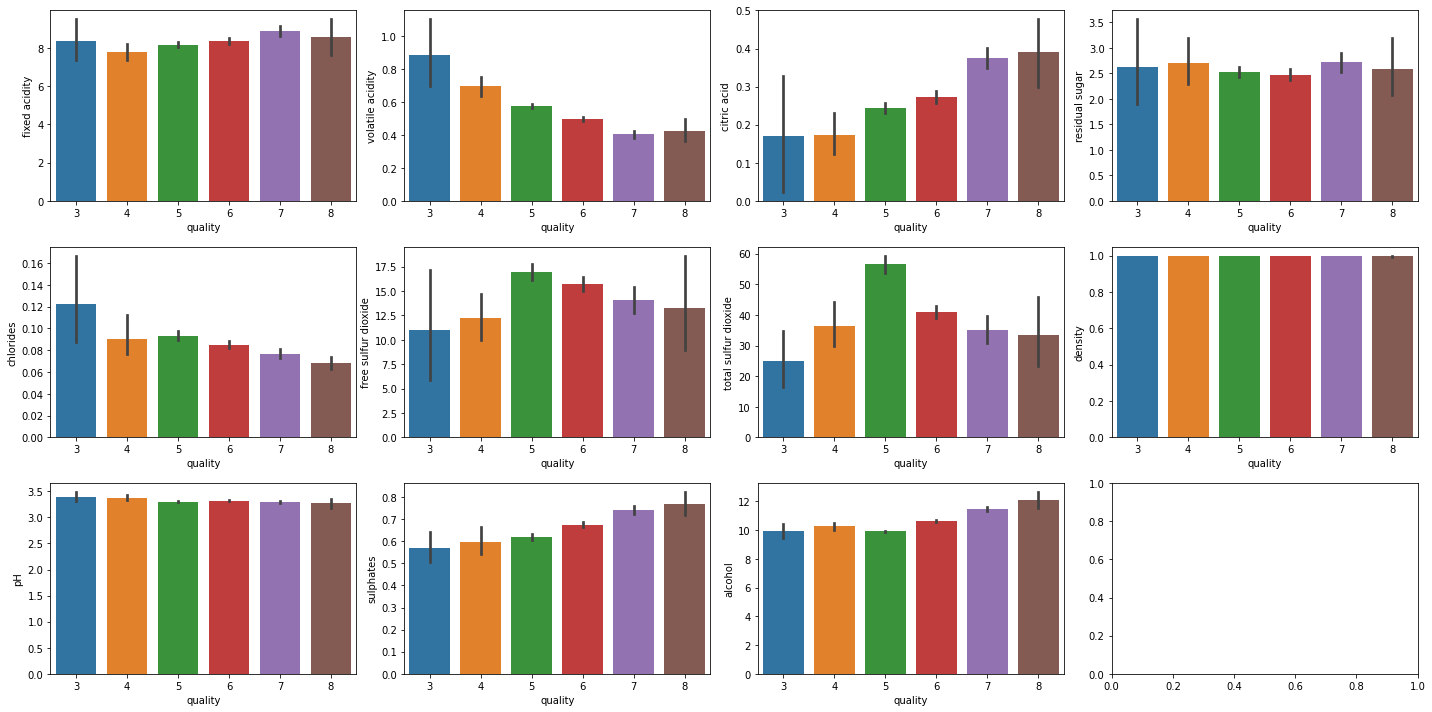

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for value, subplot in zip(range(0,11), ax.flatten()):
    sns.barplot(x=df['quality'], y=df[df.columns[value]],ax=subplot)

fig.tight_layout()
plt.show()


The barplots indicate that the most influential parameters explaining wine quality are volatile acidity, citric acid, chlorides, sulphates, and alcohol. Sulfur dioxide is noteworthy because it behaves differently.

In [9]:
#checking correlations
df_corr = df.corr()
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153791,-0.113198,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010487,0.076479,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060885,0.035506,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187310,0.203048,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005627,0.047402,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153791,-0.010487,-0.060885,0.187310,0.005627,1.000000,0.668025,-0.021981,0.070288,0.051606,-0.069346,-0.050554
total sulfur dioxide,-0.113198,0.076479,0.035506,0.203048,0.047402,0.668025,1.000000,0.071256,-0.066507,0.042923,-0.205667,-0.185112
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021981,0.071256,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070288,-0.066507,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051606,0.042923,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

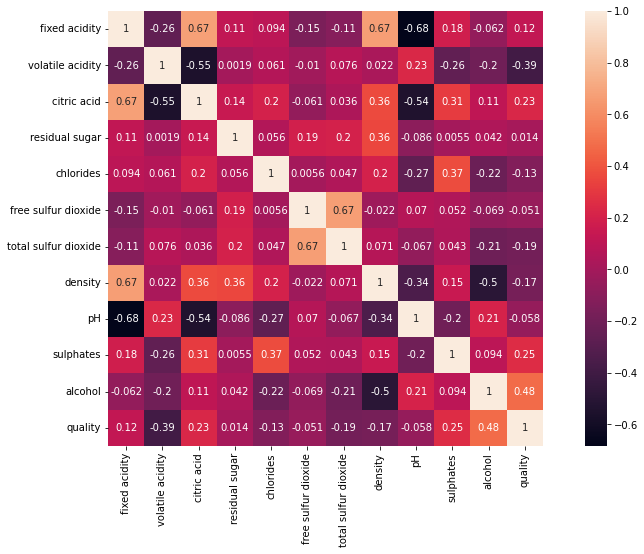

In [10]:
mask=np.array(df_corr)
fig=plt.gcf()
fig.set_size_inches(15,8)
sns.heatmap(df_corr, cbar=True,square=True,annot=True)

* No high correlation found. So we cannot choose features specifically. Better would be to take all the features for modelling.

In [11]:
#selecting Feature and target variables
X = df.drop(columns="quality", axis=1)
y = df["quality"]

In [12]:
# spliting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)

(1279, 11)
(1279,)


## Model training
* Now we will train our model using Ordinal regression. For this, we will use Statsmodels library.

In [13]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: c:\users\rahul-pc\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [14]:
#ordinal regression model
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod_prob = OrderedModel(y_train,X_train,distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 0.973499
         Iterations: 68
         Function evaluations: 71
         Gradient evaluations: 71


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                quality   Log-Likelihood:                -1245.1
Model:                   OrderedModel   AIC:                             2522.
Method:            Maximum Likelihood   BIC:                             2605.
Date:                Sun, 08 Oct 2023                                         
Time:                        16:00:36                                         
No. Observations:                1279                                         
Df Residuals:                    1263                                         
Df Model:                          11                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0269      0.049      0.548      0.584      -0.069       0.123
volatile acidity        -1.7048      0.241     -7.071      0.000      -2.177      -1.232
citric acid             -0.2458      0.289     -0.851      0.395      -0.812       0.320
residual sugar           0.0020      0.029      0.070      0.944      -0.054       0.058
chlorides               -3.0911      0.794     -3.895      0.000      -4.646      -1.536
free sulfur dioxide      0.0106      0.004      2.449      0.014       0.002       0.019
total sulfur dioxide    -0.0068      0.001     -4.691      0.000      -0.010      -0.004
density                 -1.0000     41.450     -0.024      0.981     -82.241      80.241
pH                      -0.7187      0.370     -1.943      0.052      -1.444       0.006
sulphates                1.4191      0.219      6.492      0.000       0.991       1.847
alcohol                  0.4876      0.052      9.353      0.000       0.385       0.590
3/4                     -1.4508     40.607     -0.036      0.971     -81.039      78.138
4/5                     -0.2410      0.157     -1.531      0.126      -0.550       0.068
5/6                      0.6974      0.038     18.368      0.000       0.623       0.772
6/7                      0.4718      0.039     12.040      0.000       0.395       0.549
7/8                      0.4440      0.080      5.561      0.000       0.288       0.601
========================================================================================
"""

In [15]:
#prediction from ordinal regression
y_pred_ordinal = res_prob.model.predict(res_prob.params, X_test)

#as ordinal regression gives probability of each class, we need to find class of max_prob
#below code give the correct predicted value.
y_pred_ordinal_val = [y_pred_ordinal.argmax(1) + 3]
y_pred_ordinal_val = np.array(y_pred_ordinal_val).reshape((-1,))

In [16]:
#Linear regression model
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [17]:
#prediction from linear regression
y_pred_linear = linear.predict(X_test)

#since these predictions are continuous values,we need to round it to nearest integer
y_pred_linear_val = np.round(y_pred_linear)

### Model evaluation

In [18]:
from sklearn.metrics import  accuracy_score, f1_score

print("Accuracy of Linear model: ",accuracy_score(y_test, y_pred_linear_val))
print("Accuracy of ordinal model: ",accuracy_score(y_test, y_pred_ordinal_val))

print("Accuracy of Linear model: ",f1_score(y_test, y_pred_linear_val, average="macro"))
print("Accuracy of ordinal model: ",f1_score(y_test, y_pred_ordinal_val,average="macro"))


Accuracy of Linear model:  0.571875
Accuracy of ordinal model:  0.565625
Accuracy of Linear model:  0.23933612171619553
Accuracy of ordinal model:  0.23619613247272822
